## Here we analyze kinetic model transport fluxes by Michaelis Menten Rate Form - while varying growth medium concentrations and comparing to Defined Medium Metabolite Concentration Values

The Kinetic Model describes transport as a Michaelis-Menten like reaction:

$R_{Transport} = kcat_{Transport}*[E_{Transport}]\cdot\frac{M_{S_{ext}}}{Km_{Transport}+M_{S_{ext}}}$

where $M_{S_{ext}}$ is the Defined Medium Concentration and $E_{Transport}$ are the copies of each transporters from the proteomics given in *Breuer et al 2019* and assigned to each reaction in both the Metabolic and Kinetic Models of JCVI-syn3A.

~

The plots presented in this work can be characterized as follows:

*Red Dot* - Flux based on proteomics values and Current Defined Medium Formulation *Table_S1 - Defined Medium*

*Green Dashed Line* - FBA Flux (*Note: Certain Deoxynucleoside transport reactions are preferentially chosen over Nucleoside transport reactions, no direct comparison for Amino Acid Transport via FBA Model given in Breuer et al eLife 2019*)

*Blue Line* - Flux based on kinetic model parameters scanning over a range of external media concentrations

~

In summary, due to the makeup of the Defined Medium Formulation *Table_S1 - Defined Medium* **most external metabolites supplied from the medium are predicted to be in excess to the necessary amounts for regular growth (i.e. approximate 100 minute doubling time) predicted by the kinetic model. Notable exceptions were: Phosphate (before this was corrected and returned to 134 mM as is explained below) and Spermine** (which is right at the borderline of the predicted necessary concentration by our modeling). See analysis below for further explanation.

~

Also, important to note is that uptake reactions for nucleosides and deoxynucleosides are below the FBA Metabolic Modeling (*which attempts to minimize ATP cost in uptake*) predictions and are still satisfactory in our modeling. This is due to the fact that modification reactions of nucleosides to deoxynucleosides (and visa-versa) are present in the nucleotide metabolism of JCVI-syn3A, and thus only the sum of the deoxynucleoside and nucleoside uptake in the kinetic model simulations must be greater than the sum of these reaction fluxes predicted via FBA modeling for the cell to maintain a sufficient nucleoside/tide pool.

In [1]:
# Import Needed Modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Calculate the ODE Flux for a Michaelis-Menten like Uptake Reaction
def CalcODEFlux(kcat,Km,E,S):
    rate = kcat*E*(S/(Km+S))
    return rate

In [3]:
sToh = 3600 # s/h (time)
cellMass = 10.2e-15 # g
cellVolume = 3.35e-17 # L

# Calculate the Expected ODE Flux Based on the FBA Flux presented in Breuer et al 2019 Metabolic Model
def CalcRabc(fbaflux):
    Rabc = fbaflux*(cellMass/cellVolume)*(1/sToh)
    return Rabc

In [4]:
# List of uptake fluxes from FBA Simulation (Modified from Breuer et al 2019)
fbafluxes ={
    'pi_e':0.32,
    'adn_e':0.0,
    'dadn_e':0.0886,
    'gsn_e':0.0,
    'dgsn_e':0.0649,
    'uri_e':0.107,
    'dcyt_e':0.00928,
    'thymd_e':0.0293,
    'sprm_e':0.00276,
    'nac_e':0.0000456,
    'ribflv_e':0.0000912,
    '5fthf_e':0.0000912,
    'thmpp_e':0.0000912,
    'p5p_e':0.0000912,
    'k_e':0.365,
    'ca2_e':0.00202,
    'mg2_e':0.00337,    
}

In [43]:
# Plot the concentration of substrate vs the calculated Vmax via ODE Kinetic Model
def plotCvsV(met,concs,Kcat,Km,E,Curr):
    cellVolume = 3.35e-17 # L
    NA=6.022e23 # NA
    E = (E/NA)*1000/(cellVolume)
    v_list = []
    for s in concs:
        k = CalcODEFlux(Kcat,Km,E,s)
        v_list.append(k)
        
    fig, ax = plt.subplots()
    ax.plot(concs, v_list,label='Kin. Model')
    plt.plot(curr,CalcODEFlux(Kcat,Km,E,curr),color='red',marker='o',markersize=10,label='Def. Med.')
    plt.axhline(CalcRabc(fbafluxes[met]),color='green',linestyle='--',label='FBA Model')

    ax.set(xlabel='External Conc {0} (mM)'.format(met), ylabel='Updated Vmax (mM/s)',
       title='Change in Rate of Transport vs. [{0}]'.format(met))
    ax.grid()
    
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    #ax.title.label.set_size(16)
    plt.title('Change in Rate of Transport vs. [{0}]'.format(met),fontsize=16)
    plt.legend(fontsize=16)

In [44]:
# Plot the concentration of substrate vs the calculated Vmax via ODE Kinetic Model without FBA comparison
def plotCvsVNoFBA(met,concs,Kcat,Km,E,Curr):
    cellVolume = 3.35e-17 # L
    NA=6.022e23 # NA
    E = (E/NA)*1000/(cellVolume)
    v_list = []
    for s in concs:
        k = CalcODEFlux(Kcat,Km,E,s)
        v_list.append(k)
        
    fig, ax = plt.subplots()
    ax.plot(concs, v_list,label='Kin. Model')
    plt.plot(Curr,CalcODEFlux(Kcat,Km,E,Curr),color='red',marker='o',markersize=5,label='Def. Med.')

    ax.set(xlabel='External Conc {0} (mM)'.format(met), ylabel='Updated Vmax (mM/s)',
       title='Change in Rate of Transport vs. [{0}] (mM)'.format(met), fontsize=18)
    ax.grid()
    
    plt.legend(fontsize=16)

## Phosphate Transport

Of special interest was phosphate transport, as at one point in the defined growth medium formulation (see Table_SI - Defined Medium) the **concentration of the phosphate salt buffer was decreased from 140 mM to 0.5 mM. This resulted in negative effects on cell growth and the inability to produce viable cell colonies (as our model predicts below)**. 

After this the phosphate buffer component was adjusted to 134 mM, well within the acceptable range predicted by our model.

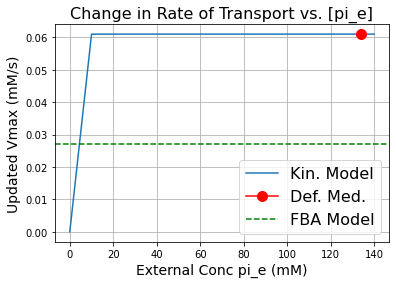

In [45]:
met = 'pi_e'
concs = np.arange(0,150,10)
Kcat = 10 # 1/s
Km = 0.0031 # mM
E = 123 # copies - JCVISYN3A_0427
curr=134 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Adenosine Transport

*Note: Certain Deoxynucleoside transport reactions are preferentially chosen over Nucleoside transport reactions (in order to decrease ATP usage in the metabolic model), decreasing the ability for a direct comparison of the kinetic model to the FBA model, since kinetically all available reaction routes where transport proteins are expression will be used in our kinetic formulation, which does not discriminate to minimize ATP usage in transport if both substrate and transporter are available.*

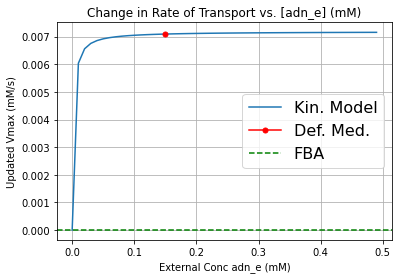

In [8]:
met = 'adn_e'
concs = np.arange(0,0.5,0.01)
Kcat = 1.0 # 1/s
Km = 1.9/10**3 # mM
E = 145 # copies - JCVISYN3A_0010
curr = 0.15 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Deoxyadenosine Transport

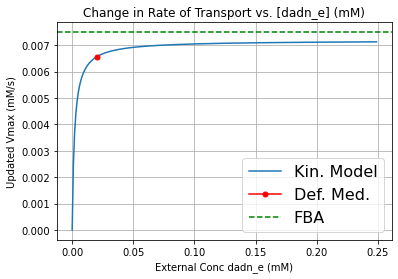

In [9]:
met = 'dadn_e'
concs = np.arange(0,0.25,0.001)
Kcat = 1.0 # 1/s
Km = 1.9/10**3 # mM
E = 145 # copies - JCVISYN3A_0010
curr = 0.02 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Guanosine Transport

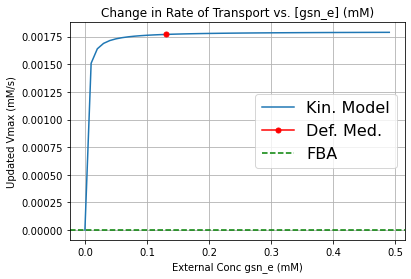

In [10]:
met = 'gsn_e'
concs = np.arange(0,0.5,0.01)
Kcat = 0.25 # 1/s
Km = 1.9/10**3 # mM
E = 145 # copies - JCVISYN3A_0010
curr = 0.13 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Deoxyguanosine Transport

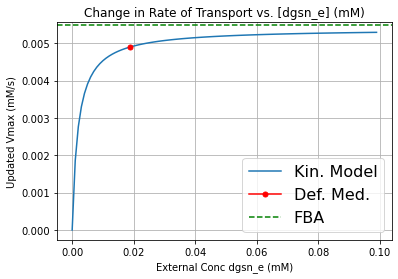

In [11]:
met = 'dgsn_e'
concs = np.arange(0,0.1,0.001)
Kcat = 0.75 # 1/s
Km = 1.9/10**3 # mM
E = 145 # copies - JCVISYN3A_0010
curr = 0.0187 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Uridine Transport

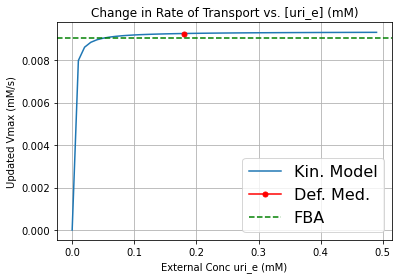

In [12]:
met = 'uri_e'
concs = np.arange(0,0.5,0.01)
Kcat = 1.3 # 1/s
Km = 1.7/10**3 # mM
E = 145 # copies - JCVISYN3A_0010
curr = 0.18 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Deoxycytosine Transport

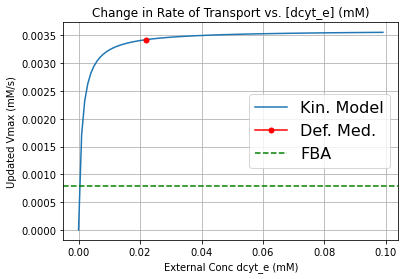

In [13]:
met = 'dcyt_e'
concs = np.arange(0,0.1,0.001)
Kcat = 0.5 # 1/s
Km = 1.1/10**3 # mM
E = 145 # copies - JCVISYN3A_0010
curr = 0.022 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Thymidine Transport

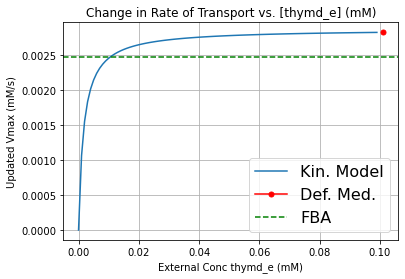

In [14]:
met = 'thymd_e'
concs = np.arange(0,0.1,0.001)
Kcat = 0.4 # 1/s
Km = 1.7/10**3 # mM
E = 145 # copies - JCVISYN3A_0010
curr = 0.101 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Spermine Transport

While, the amount of spermine given in the Defined Medium (Table_SI - Defined Medium) is slightly less than what we would predict to be utilized via the FBA Model given in *Breuer et al eLife (2019)* it seems to be able to support JCVI-syn3A growth *in vivo*.

It's possible that the excess of Magnesium in the Defined Medium, shown below, may compensate for the slight lack of spermine present in stabilization of nucleic acid compounds and the DNA (*e.g.* Mg-ATP).

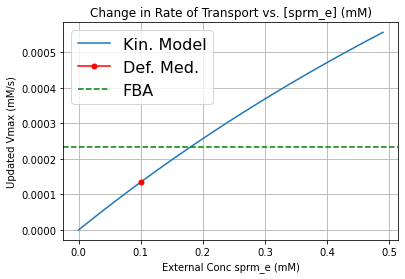

In [15]:
met = 'sprm_e'
concs = np.arange(0,0.5,0.01)
Kcat = 3.0 # 1/s
Km = 2.0 # mM
E = 19 # copies - min(JCVISYN3A_0195-_0197)
curr = 0.1 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Nicotinic Acid Transport

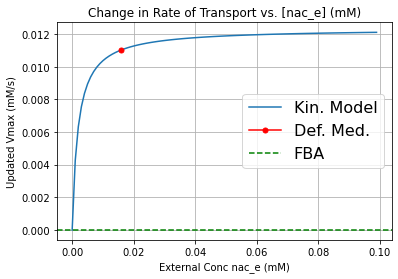

In [16]:
met = 'nac_e'
concs = np.arange(0,0.1,0.001)
Kcat = 1.66 # 1/s
Km = 0.0019 # mM
E = 150 # copies - JCVISYN3A_0314
curr = 0.016 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Riboflavin Acid Transport

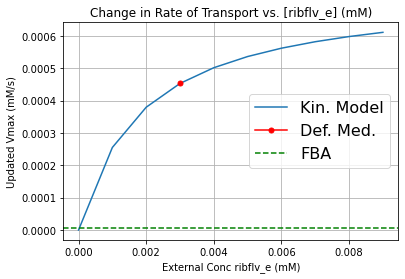

In [17]:
met = 'ribflv_e'
concs = np.arange(0,0.01,0.001)
Kcat = 1.66 # 1/s
Km = 0.0019 # mM
E = 9 # copies - JCVISYN3A_0877
curr = 0.003 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## 5 formyl tetrahydrofolate Transport

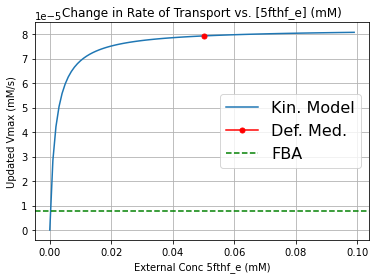

In [18]:
met = '5fthf_e'
concs = np.arange(0,0.1,0.001)
Kcat = 1.66 # 1/s
Km = 0.0019 # mM
E = 1 # copies - in lowest possible case based on proteomics - still much greater than required flux FBA - JCVISYN3A_0822
curr = 0.05 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Thiamin Diphosphate Transport

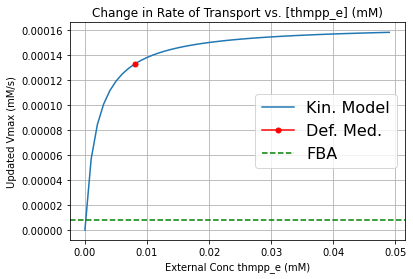

In [19]:
met = 'thmpp_e'
concs = np.arange(0,0.05,0.001)
Kcat = 1.66 # 1/s
Km = 0.0019 # mM
E = 2 # copies - in lowest possible case based on proteomics - still much greater than required flux FBA - min(JCVISYN3A_0706-0708)
curr = 0.008 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Pyridoxal 5-phosphate Transport

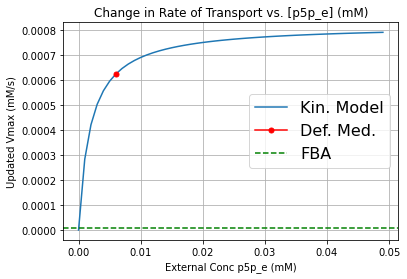

In [20]:
met = 'p5p_e'
concs = np.arange(0,0.05,0.001)
Kcat = 1.66 # 1/s
Km = 0.0019 # mM
E = 10 # copies - JCVISYN3A_0345
curr = 0.006 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Potassium Transport

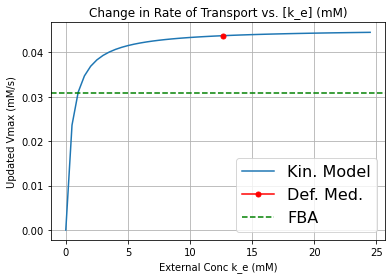

In [21]:
met = 'k_e'
concs = np.arange(0,25,0.5)
Kcat = 3.0 # 1/s
Km = 0.46 # mM
E = 305 # copies - JCVISYN3A_0686
curr = 12.66 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Calcium Transport

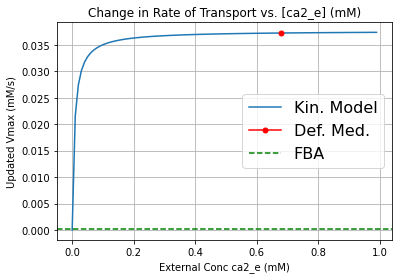

In [22]:
met = 'ca2_e'
concs = np.arange(0,1,0.01)
Kcat = 9.5 # 1/s
Km = 0.0075 # mM
E = 80 # copies - JCVISYN3A_0879
curr = 0.68 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Magnesium Transport

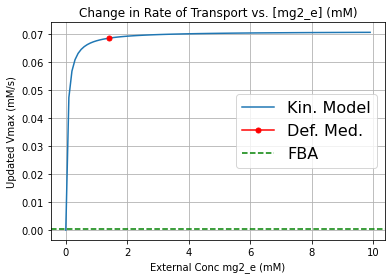

In [23]:
met = 'mg2_e'
concs = np.arange(0,10,0.1)
Kcat = 22.0 # 1/s
Km = 0.05 # mM
E = 65 # copies - JCVISYN3A_0787
curr = 1.4 # mM
plotCvsV(met,concs,Kcat,Km,E,curr)

## Amino Acid Transport

*NOTE: no direct comparison for Amino Acid Transport via FBA Model given in Breuer et al eLife 2019*

This is due the fact that amino acid transport occurs both by the Opp transport system (genes /*0165-0169*), as while as by a proton symport system (gene /*0886* - the gluatamate/aspartate permease, and genes /*0876* and /*0878* amino acid permeases of unknown substrate specificity).

In [28]:
# ReactionID (FBA), ReactionKey (Kinetic Model), Product Metabolite Key, Km, KcatSymport,kcatAbc, Ext. Medium Conc.
aaTransport = [['R_ARGt2r', 'R_ARG4abc', 'M_arg__L_c', 0.03, 3.4, 0.8, 4.17],
        ['R_ASPt2pr', 'R_ASP4abc', 'M_asp__L_c', 0.03, 6.1, 0.8, 1.3e-1], 
        ['R_GLYt2r', 'R_GLY4abc', 'M_gly_c', 0.03, 5.1, 0.8, 4.33], 
        ['R_ISOt2r', 'R_ISO4abc', 'M_ile__L_c', 0.03, 6.1, 0.8, 4.08],
        ['R_ALAt2r', 'R_ALA4abc', 'M_ala__L_c', 0.03, 5.1, 0.8, 4.14],
        ['R_ASNt2r', 'R_ASN4abc', 'M_asn__L_c', 0.03, 5.1, 0.8, 4.07],
        ['R_LEUt2r', 'R_LEU4abc', 'M_leu__L_c', 0.03, 6.1, 0.8, 4.2],
        ['R_HISt2r', 'R_HIS4abc', 'M_his__L_c', 0.03, 3.4, 0.8, 4.05],
        ['R_LYSt2r', 'R_LYS4abc', 'M_lys__L_c', 0.03, 6.1, 0.8, 4.2],
        ['R_PROt2r', 'R_PRO4abc', 'M_pro__L_c', 0.03, 3.4, 0.8, 4.17],
        ['R_PHEt2r', 'R_PHE4abc', 'M_phe__L_c', 0.03, 3.4, 0.8, 1.08],
        ['R_THRt2r', 'R_THR4abc', 'M_thr__L_c', 0.03, 5.1, 0.8, 1.13],
        ['R_TRPt2r', 'R_TRP4abc', 'M_trp__L_c', 0.03, 3.4, 0.8, 0.52],
        ['R_TYRt2r', 'R_TYR4abc', 'M_tyr__L_c', 0.03, 3.4, 0.8, 4],
        ['R_VALt2r', 'R_VAL4abc', 'M_val__L_c', 0.03, 5.1, 0.8, 8],
        ['R_SERt2r', 'R_SER4abc', 'M_ser__L_c', 0.03, 5.1, 0.8, 1.1],
        ['R_METt2r', 'R_MET4abc', 'M_met__L_c', 0.03, 3.4, 0.8, 8.05],
        ['R_CYSt2r', 'R_CYS4abc', 'M_cys__L_c', 0.03, 3.4, 0.8, 3.2], 
        ['R_GLUt2pr', 'R_GLU4abc', 'M_glu__L_c', 0.03, 0.8, 0.8, 4.3],
        ['R_GLNt2r', 'R_GLN4abc', 'M_gln__L_c', 0.03, 7.1, 0.8, 2]]

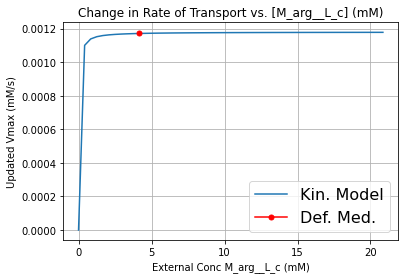

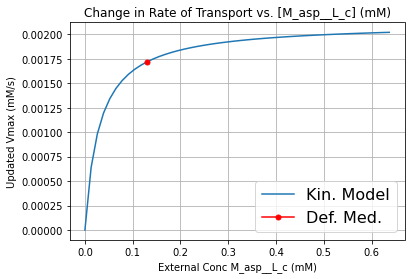

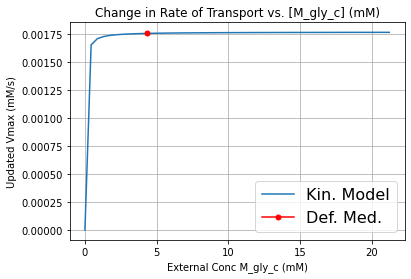

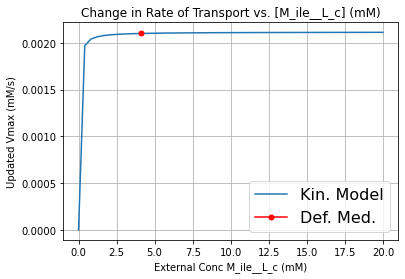

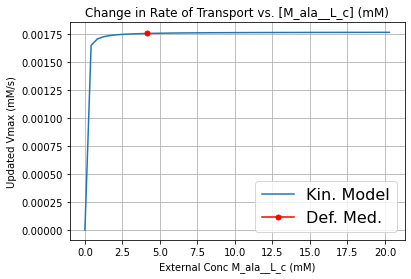

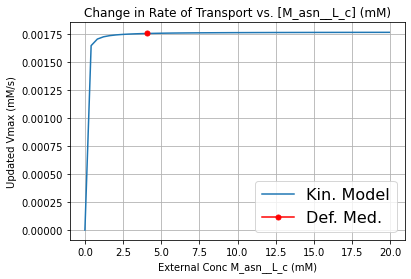

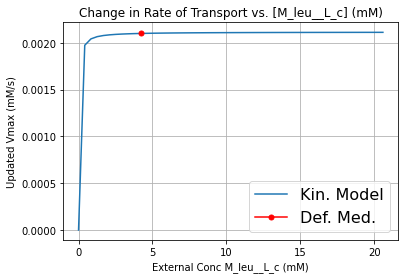

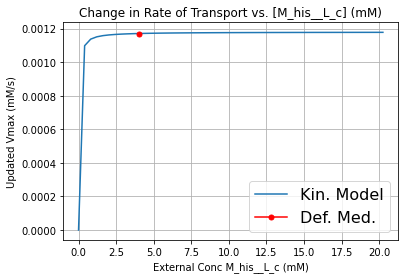

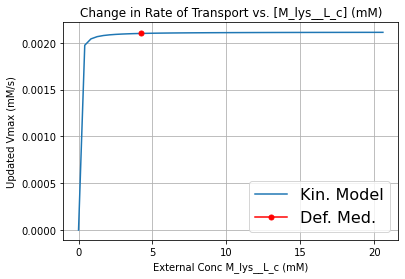

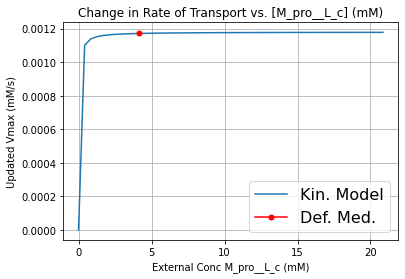

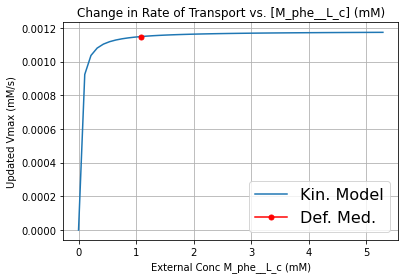

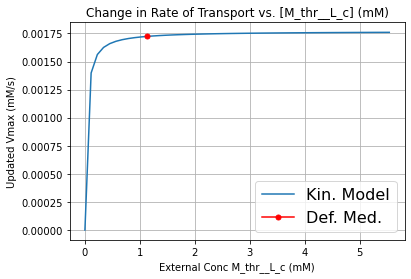

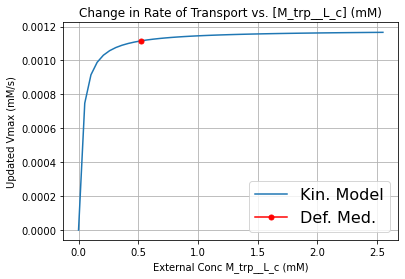

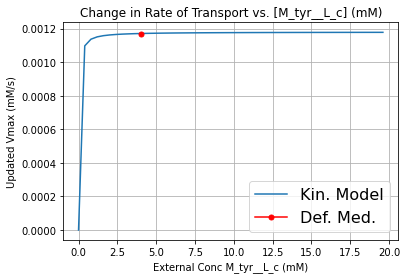

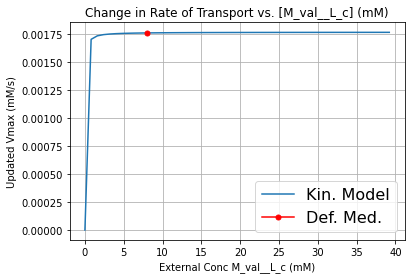

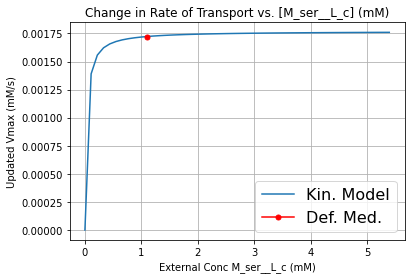

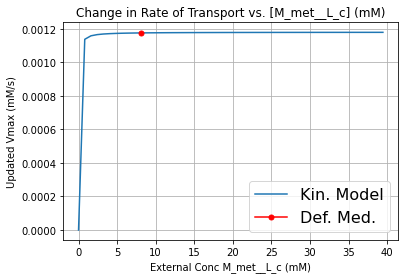

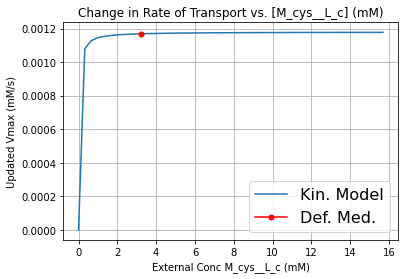

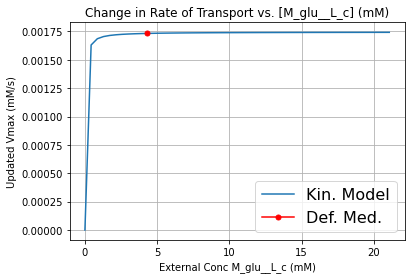

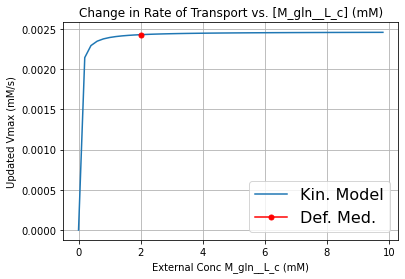

In [33]:
for rxn in aaTransport:
        rxnIDsymp = rxn[0] # Reaction ID for Symport Reaction (amino acid permeases)
        rxnIDabc = rxn[1] # Reaction ID for abc transport Reaction (Opp system) - JCVISYN3A_0166-0169
        metID = rxn[2] # Metabolite ID
        Km = rxn[3] # Km for uptake (mM)
        KcatSymp = rxn[4] # Kcat for symport reaction (1/s)
        KcatAbc = rxn[5] # Kcat for ABC Transport reaction (1/s)
        ExtConc = rxn[6] # External Medium Concentration (mM) - Table_S1 Defined Medium 
        
        if rxnIDsymp == 'R_GLUt2pr':
            E=44 # Available proton-glutamate symport transport enzymes (JCVISYN3A_0886)
        else:
            E=7 # Minimum possible number of amino acid permease copies from proteomics (JCVISYN3A_0876)
            KcatAbc=KcatSymp # The above value is likely higher as transport via the Opp system is also possible
            # As well as an additional putative amino acid permease (JCVISYN3A_0878) with 46 copies reported.
        
        plotCvsVNoFBA(metID,np.arange(0,ExtConc*5,ExtConc/10.0),KcatAbc,Km,E,ExtConc)

In [34]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')